# Сравнение лексики отзывов на гостиницы (и другие объекты размещения) для разных регионов

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
SPb3=pd.read_csv("SPb3.csv")
SPb4=pd.read_csv("SPb4.csv")
SPb5=pd.read_csv("SPb5.csv")
Sochi3=pd.read_csv("Sochi3.csv")
Sochi4=pd.read_csv("Sochi4.csv")
Sochi5=pd.read_csv("Sochi5.csv")
UBK3=pd.read_csv("UBK3.csv")
UBK4=pd.read_csv("UBK4.csv")
UBK5=pd.read_csv("UBK5.csv")

In [4]:
cols=["3_words", "3_coeff", "4_words", "4_coeff", "5_words", "5_coeff"]
SPb=pd.DataFrame(index=SPb3.index, columns=cols)
Sochi=pd.DataFrame(index=SPb3.index, columns=cols)
UBK=pd.DataFrame(index=SPb3.index, columns=cols)

In [5]:
data_list=[SPb3,SPb4,SPb5]
for i in range(0,len(data_list)):
    SPb.iloc[:,2*i]=data_list[i].iloc[:,0]
    SPb.iloc[:,2*i+1]=data_list[i].iloc[:,1]

In [6]:
SPb.tail()

,3_words,3_coeff,4_words,4_coeff,5_words,5_coeff
45,ждать,0.066227,выходить двор,0.061323,понравиться,0.070881
46,деньга,0.068983,принцип,0.061864,уютный,0.071025
47,грязный,0.069898,вполне,0.077993,уровень,0.071677
48,ужасный,0.087166,целое,0.081403,спасибо,0.076506
49,отвратительный,0.111930,минус,0.102857,отличный,0.101699


In [7]:
data_list=[Sochi3,Sochi4,Sochi5]
for i in range(0,len(data_list)):
    Sochi.iloc[:,2*i]=data_list[i].iloc[:,0]
    Sochi.iloc[:,2*i+1]=data_list[i].iloc[:,1]
data_list=[UBK3,UBK4,UBK5]
for i in range(0,len(data_list)):
    UBK.iloc[:,2*i]=data_list[i].iloc[:,0]
    UBK.iloc[:,2*i+1]=data_list[i].iloc[:,1]

In [8]:
Sochi.tail()

,3_words,3_coeff,4_words,4_coeff,5_words,5_coeff
45,деньга,0.065136,часто,0.058704,процедура,0.063884
46,ужасный,0.066637,питание хороший,0.064326,отличный отель,0.069433
47,грязный,0.071505,уходить,0.064725,уютный,0.076558
48,отсутствовать,0.072849,минус,0.072238,отличный,0.078929
49,отвратительный,0.083130,целое,0.087017,спасибо,0.080227


In [9]:
UBK.tail()

,3_words,3_coeff,4_words,4_coeff,5_words,5_coeff
45,столовый,0.075341,питание хороший,0.054949,замечательный,0.065139
46,грязный,0.080264,они,0.060194,продумать,0.066435
47,отвратительный,0.101248,хороший отель,0.060412,домашний,0.075774
48,ужасный,0.102931,немного,0.078887,спасибо весь,0.080300
49,деньга,0.111737,целое,0.084313,спасибо,0.108230


# Общие слова, характерные для негативных/позитивных отзывов:

In [10]:
def common(mark,data_list):
    word_col=str(mark)+"_words"
    coeff_col=str(mark)+"_coeff"
    words=set(data_list[0][word_col])
    for i in range(1, len(data_list)):
        words=words&set(data_list[i][word_col])
    return words

## На "тройку":

In [11]:
print(common(3,[SPb, Sochi, UBK]))

{'деньга', 'ужасный', 'отвратительный', 'старый', 'отсутствовать', 'ужас', 'грязный'}


## На "четверку":

In [12]:
print(common(4,[SPb, Sochi, UBK]))

{'вполне', 'целое'}


## На "пятерку":

In [13]:
print(common(5,[SPb, Sochi, UBK]))

{'уютный', 'замечательный', 'чисто', 'уровень', 'спасибо', 'комфортный', 'очень понравиться'}


### ...достаточно ожидаемый результат...

# Слова, характерные только для данного города (региона)

In [14]:
def get_char_words(mark, data_list):
    word_col=str(mark)+"_words"
    coeff_col=str(mark)+"_coeff"
    alldicts=[]
    for i in range(0, len(data_list)):
        the_rest=data_list.copy()
        data=the_rest.pop(i)
        char_words=set(data[word_col])
        for other in the_rest:
            char_words=char_words-set(other[word_col]) # убрали слова, которые есть в других данных
        with_freq=dict.fromkeys(char_words,0)
        for w in char_words:
            with_freq[w]=data.loc[data[word_col]==w,coeff_col].item()
        alldicts.append(with_freq)
    return alldicts

In [15]:
mark3_char_words=get_char_words(3,[SPb, Sochi, UBK])
mark4_char_words=get_char_words(4,[SPb, Sochi, UBK])
mark5_char_words=get_char_words(5,[SPb, Sochi, UBK])

In [16]:
from wordcloud import WordCloud  # Пакет для построения облаков слов

In [17]:
#plt.style.available
plt.style.use('seaborn-white')

In [18]:
def plotWordCloud(title, words_proba):
    
    text=words_proba
    
    wordcloud = WordCloud(background_color="white", max_words=50, width=1000, height=1000,
                          min_font_size=14,max_font_size=84, font_step=1,relative_scaling=1)
    wordcloud = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10, 10))
    plt.title(title, fontsize=24)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

In [19]:
def pltWordCloud_short(title, words_proba):
   
    text=words_proba
    
    wordcloud = WordCloud(background_color="white", width=1000, height=1000, max_words=50,
                          min_font_size=14,max_font_size=84, font_step=1,relative_scaling=1)
    wordcloud = wordcloud.generate_from_frequencies(text)
    #plt.figure(figsize=(10, 10))
    plt.title(title, fontsize=18)
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis("off");

# Слова, характерные для отзывов на "5":

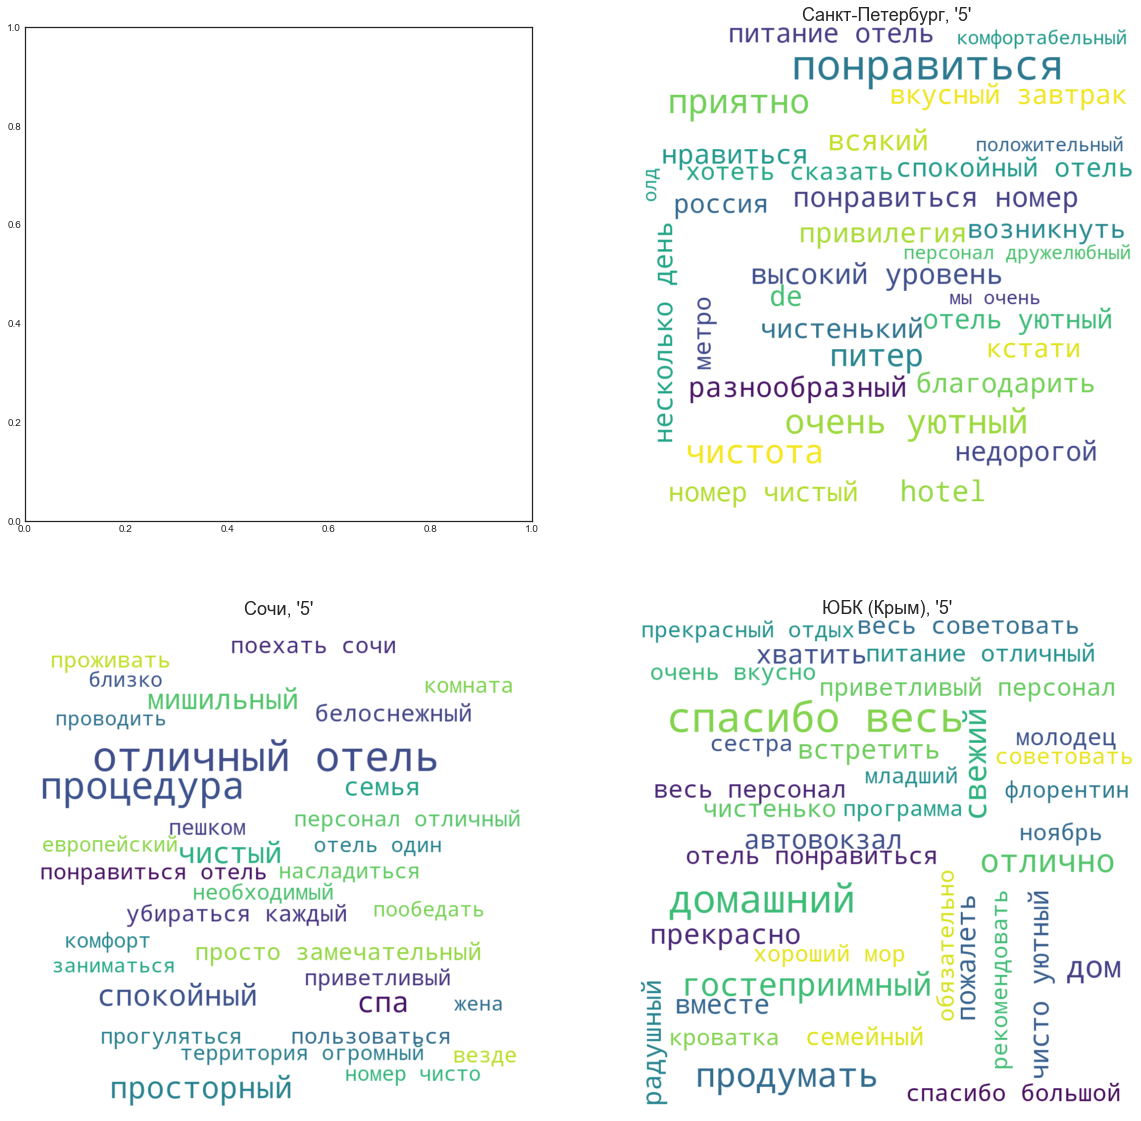

In [20]:
fig, ax= plt.subplots(figsize=(20,20), nrows=2, ncols=2)
titles=["Санкт-Петербург, \'5\'","Сочи, \'5\'", "ЮБК (Крым), \'5\'"]
for i in range(1,4):
    plt.subplot(2,2,i+1)
    plt.axis("off")
    pltWordCloud_short(titles[i-1],mark5_char_words[i-1])

In [32]:
print("С.-Пб.: ",np.sort(list(mark5_char_words[0].keys())),'\n')
print("Сочи: ",np.sort(list(mark5_char_words[1].keys())),'\n')
print("Крым: ",np.sort(list(mark5_char_words[2].keys())),'\n')

С.-Пб.:  ['de' 'hotel' 'благодарить' 'вкусный завтрак' 'возникнуть' 'всякий'
 'высокий уровень' 'комфортабельный' 'кстати' 'метро' 'мы очень'
 'недорогой' 'несколько день' 'номер чистый' 'нравиться' 'олд'
 'отель уютный' 'очень уютный' 'персонал дружелюбный' 'питание отель'
 'питер' 'положительный' 'понравиться' 'понравиться номер' 'привилегия'
 'приятно' 'разнообразный' 'россия' 'спокойный отель' 'хотеть сказать'
 'чистенький' 'чистота'] 

Сочи:  ['белоснежный' 'близко' 'везде' 'европейский' 'жена' 'заниматься'
 'комната' 'комфорт' 'мишильный' 'насладиться' 'необходимый' 'номер чисто'
 'отель один' 'отличный отель' 'персонал отличный' 'пешком' 'поехать сочи'
 'пользоваться' 'понравиться отель' 'пообедать' 'приветливый' 'проводить'
 'прогуляться' 'проживать' 'просто замечательный' 'просторный' 'процедура'
 'семья' 'спа' 'спокойный' 'территория огромный' 'убираться каждый'
 'чистый'] 

Крым:  ['автовокзал' 'весь персонал' 'весь советовать' 'вместе' 'встретить'
 'гостеприимный' 'дом' 'до

Если не брать в расчет слова общего характера (которые все равно остаются) (чистота, комфорт, гостеприимство, хороший персонал, вкусный завтрак, уют и т.п.), то для хороших отзывов на "5" отмечают следующие особенности:

   **в Санкт-Петербурге:**
   невысокая цена отеля ("недорогой"), близость к метро ("метро"), "олд"
   
   **в Сочи:**
   процедуры и спа, "территория огромный", "прогуляться" и "пешком", "семья", а также "жена"
   
   **в Крыму:**
   также "семейный", "хорошее море", а также "автовокзал" - видимо, речь идет о трансфере, либо о близости к автовокзалу

# Слова, характерные для отзывов на "4":

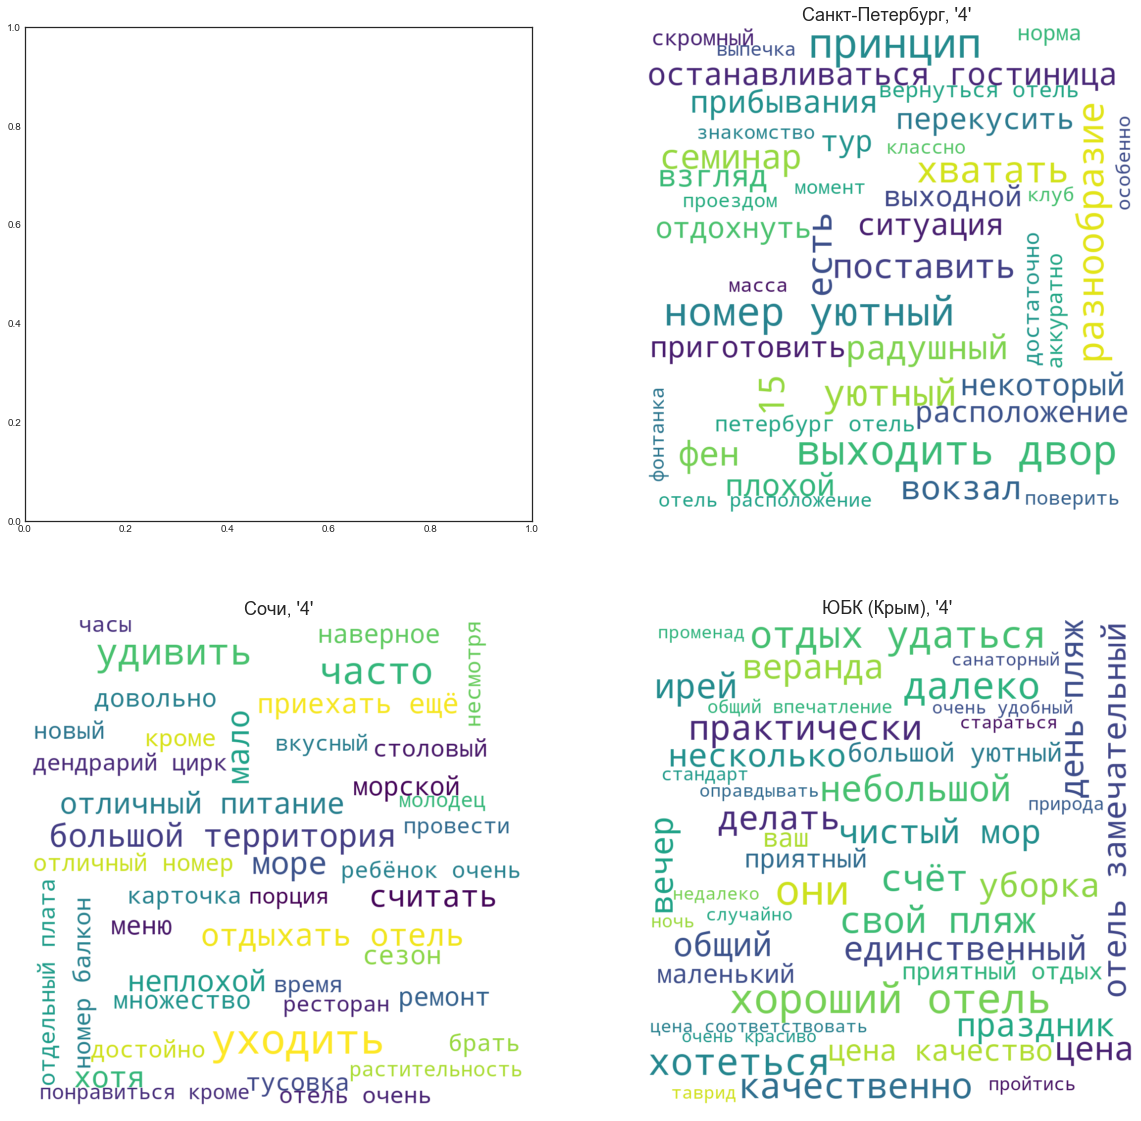

In [24]:
fig, ax= plt.subplots(figsize=(20,20), nrows=2, ncols=2)
titles=["Санкт-Петербург, \'4\'","Сочи, \'4\'", "ЮБК (Крым), \'4\'"]
for i in range(1,4):
    plt.subplot(2,2,i+1)
    plt.axis("off")
    pltWordCloud_short(titles[i-1],mark4_char_words[i-1])

In [31]:
print("С.-Пб.: ",np.sort(list(mark4_char_words[0].keys())),'\n')
print("Сочи: ",np.sort(list(mark4_char_words[1].keys())),'\n')
print("Крым: ",np.sort(list(mark4_char_words[2].keys())),'\n')

С.-Пб.:  ['15' 'аккуратно' 'вернуться отель' 'взгляд' 'вокзал' 'выпечка'
 'выходить двор' 'выходной' 'достаточно' 'есть' 'знакомство' 'классно'
 'клуб' 'масса' 'момент' 'некоторый' 'номер уютный' 'норма' 'особенно'
 'останавливаться гостиница' 'отдохнуть' 'отель расположение' 'перекусить'
 'петербург отель' 'плохой' 'поверить' 'поставить' 'прибывания'
 'приготовить' 'принцип' 'проездом' 'радушный' 'разнообразие'
 'расположение' 'семинар' 'ситуация' 'скромный' 'тур' 'уютный' 'фен'
 'фонтанка' 'хватать'] 

Сочи:  ['большой территория' 'брать' 'вкусный' 'время' 'дендрарий цирк'
 'довольно' 'достойно' 'карточка' 'кроме' 'мало' 'меню' 'множество'
 'молодец' 'море' 'морской' 'наверное' 'неплохой' 'несмотря' 'новый'
 'номер балкон' 'отдельный плата' 'отдыхать отель' 'отель очень'
 'отличный номер' 'отличный питание' 'понравиться кроме' 'порция'
 'приехать ещё' 'провести' 'растительность' 'ребёнок очень' 'ремонт'
 'ресторан' 'сезон' 'столовый' 'считать' 'тусовка' 'удивить' 'уходить'
 'хотя' 'ч

Для отзывов на "4" вызывают интерес следующие слова:

   **в Санкт-Петербурге:**
   "знакомство", "клуб", "проездом", "семинар", "выпечка", "фен"
   Видимо, в Питере люди чаще ездят в клубы (или шум клубов мешает по ночам?), бывают проездом, посещают семинары, ценят хорошую выпечку. И, в отличие от жарких Крыма и Сочи, работающие фены здесь очень важны.
   
   **в Сочи:**
   Из хорошего - "растительность", "дендрарий", "цирк", "тусовка". Из минусов - "ремонт"
   
   **в Крыму:**
   "свой пляж" (и, вообще, "пляж"), "очень красиво", "веранда", "чистое море", "цена соответствовать", "цена-качество"

### С четверкой сложнее всего, т.к. здесь должны присутствовать слова и позитивного, и негативного характера, поэтому наборы слов труднее интерпретировать.

# Негативные слова для разных регионов:

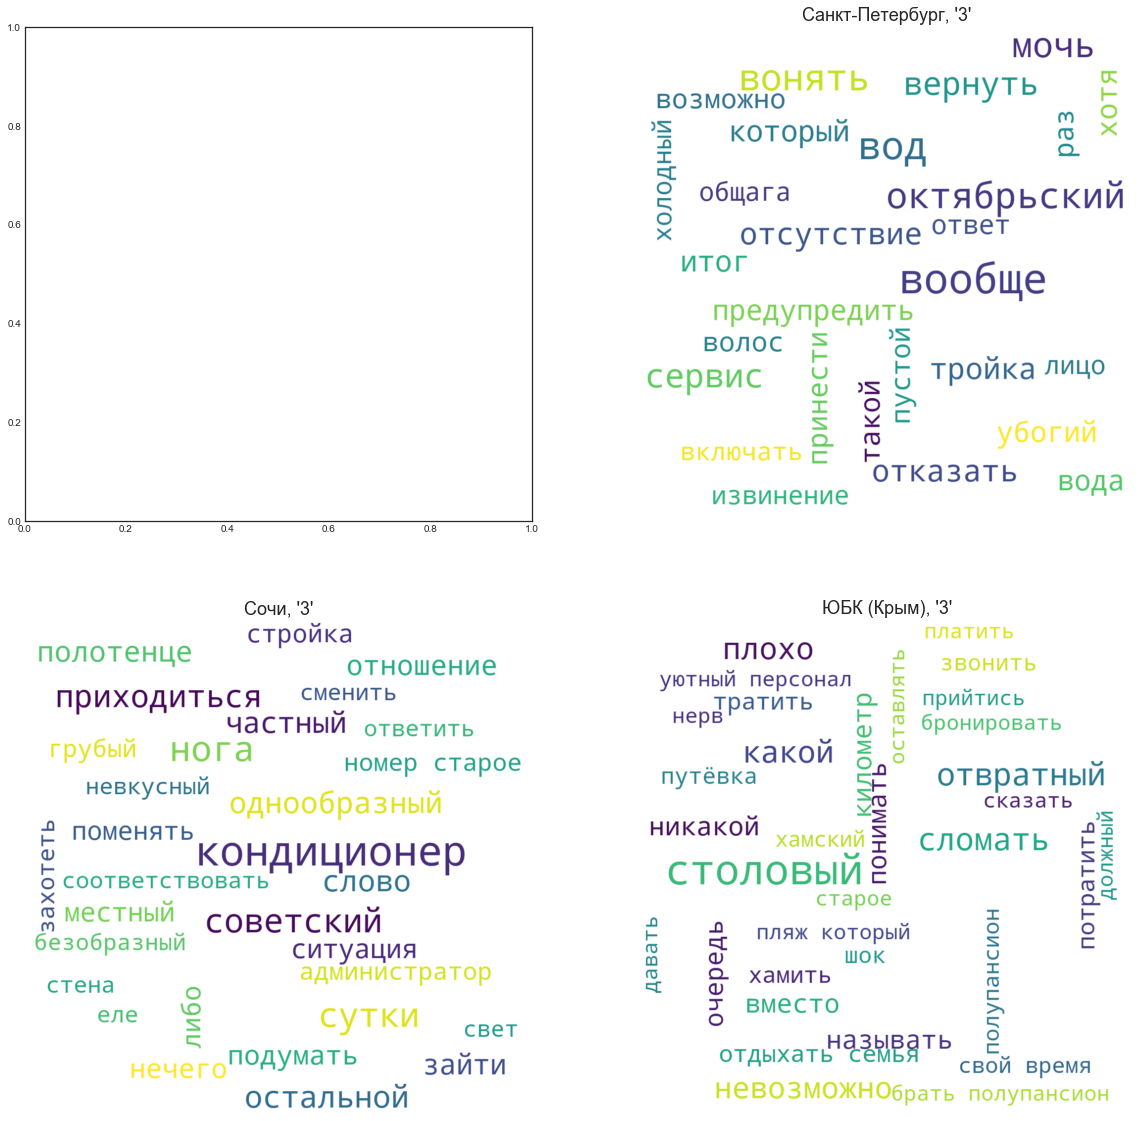

In [27]:
fig, ax= plt.subplots(figsize=(20,20), nrows=2, ncols=2)
titles=["Санкт-Петербург, \'3\'","Сочи, \'3\'", "ЮБК (Крым), \'3\'"]
for i in range(1,4):
    plt.subplot(2,2,i+1)
    plt.axis("off")
    pltWordCloud_short(titles[i-1],mark3_char_words[i-1])
#plotWordCloud("Санкт-Петербург, оценка 3",)

In [33]:
print("С.-Пб.: ",np.sort(list(mark3_char_words[0].keys())),'\n')
print("Сочи: ",np.sort(list(mark3_char_words[1].keys())),'\n')
print("Крым: ",np.sort(list(mark3_char_words[2].keys())),'\n')

С.-Пб.:  ['вернуть' 'включать' 'вод' 'вода' 'возможно' 'волос' 'вонять' 'вообще'
 'извинение' 'итог' 'который' 'лицо' 'мочь' 'общага' 'октябрьский' 'ответ'
 'отказать' 'отсутствие' 'предупредить' 'принести' 'пустой' 'раз' 'сервис'
 'такой' 'тройка' 'убогий' 'холодный' 'хотя'] 

Сочи:  ['администратор' 'безобразный' 'грубый' 'еле' 'зайти' 'захотеть'
 'кондиционер' 'либо' 'местный' 'невкусный' 'нечего' 'нога' 'номер старое'
 'однообразный' 'остальной' 'ответить' 'отношение' 'подумать' 'полотенце'
 'поменять' 'приходиться' 'свет' 'ситуация' 'слово' 'сменить' 'советский'
 'соответствовать' 'стена' 'стройка' 'сутки' 'частный'] 

Крым:  ['брать полупансион' 'бронировать' 'вместо' 'давать' 'должный' 'звонить'
 'какой' 'километр' 'называть' 'невозможно' 'нерв' 'никакой' 'оставлять'
 'отвратный' 'отдыхать семья' 'очередь' 'платить' 'плохо' 'пляж который'
 'полупансион' 'понимать' 'потратить' 'прийтись' 'путёвка' 'свой время'
 'сказать' 'сломать' 'старое' 'столовый' 'тратить' 'уютный персонал'
 

Для негативных отзывов характерны следующие проблемы:

   **в Санкт-Петербурге:**
   проблемы с водой (видимо, горячей), холод
   
   **в Сочи:**
   проблемы с кондиционерами, стройка - больше нареканий на частный сектор, видимо (судя по слову "частный").
   
   **в Крыму:**
   Жалуются отдыхающие семьями, не нравится пляж, далеко море ("километр"), плохое питание, жалобы на проживание в санатории (что интересно, слова "путевка" и "полупансион" вышли в "топ" только для Крыма).